# Network Architecture Exploration: Understanding Underfitting and Overfitting
## Background
This exercise aims to demonstrate how different neural network architectures can lead to underfitting or overfitting. You will experiment with various configurations of a fully connected neural network to observe these phenomena.

## Underfitting
Occurs when a model is too simple to capture the underlying pattern of the data. Often caused by having too few layers or neurons.

## Overfitting
Happens when a model learns the training data too well, including the noise, making it perform poorly on new, unseen data. This can result from having too many layers or neurons.

## Setup
Import the necessary libraries and prepare the dataset.

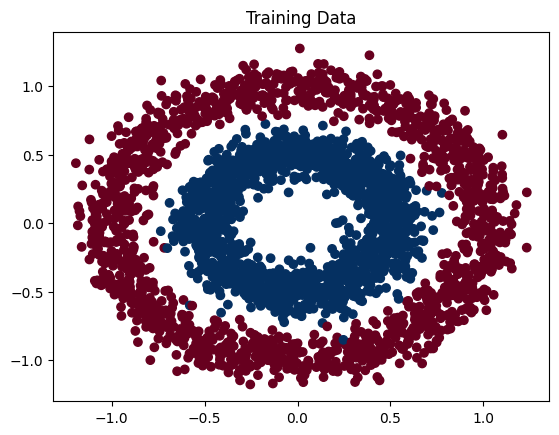

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=6000, noise=0.09, factor=0.5, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()

# Model Building
Define a function to create a model with a variable number of layers and neurons.

In [2]:
def build_model(num_layers=1, num_neurons=10, activation_function='sigmoid'):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(num_neurons, activation=activation_function, input_shape=(2,)))
    
    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_function))
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


# Train and Evaluate Model Script
Below is a skeleton for a function to train and evaluate your models. Fill in the missing parts as indicated by the comments.

94/94 [==============================] - 0s 2ms/step


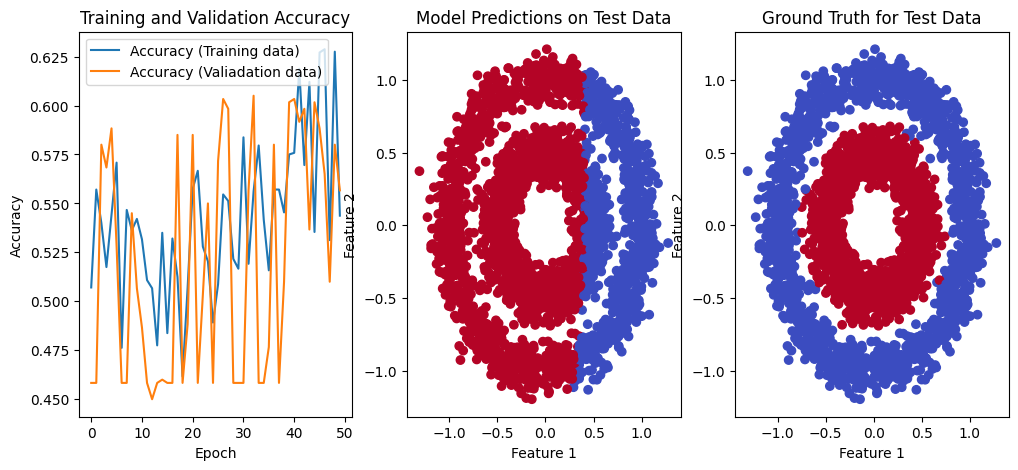

Test Loss: 0.6882
Test Accuracy: 0.6057


In [5]:
def train_and_evaluate_model(model, epochs=50, plot=True):
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose= 0)

    # Plotting (if enabled)
    if plot:
        plt.figure(figsize=(12, 5))

        # Plot training and validation accuracy
        plt.subplot(1,3,1)
        plt.plot(history.history['accuracy'], label = 'Accuracy (Training data)')
        plt.plot(history.history['val_accuracy'], label = 'Accuracy (Valiadation data)')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot model predictions vs. ground truth on the test set
        # TASK: Add code to plot model predictions and ground truth
        # Predicting on test data
        predictions = model.predict(X_test) > 0.5

        # Plotting model predictions
        plt.subplot(1, 3, 2)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
        plt.title('Model Predictions on Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Plotting ground truth
        plt.subplot(1, 3, 3)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
        plt.title('Ground Truth for Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')


        plt.show()

    # TASK: Print or return any other metrics or plots you think are necessary
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Example of using the function with a specific architecture
model = build_model(num_layers=2, num_neurons=10)
train_and_evaluate_model(model, epochs=50)


94/94 [==============================] - 0s 4ms/step


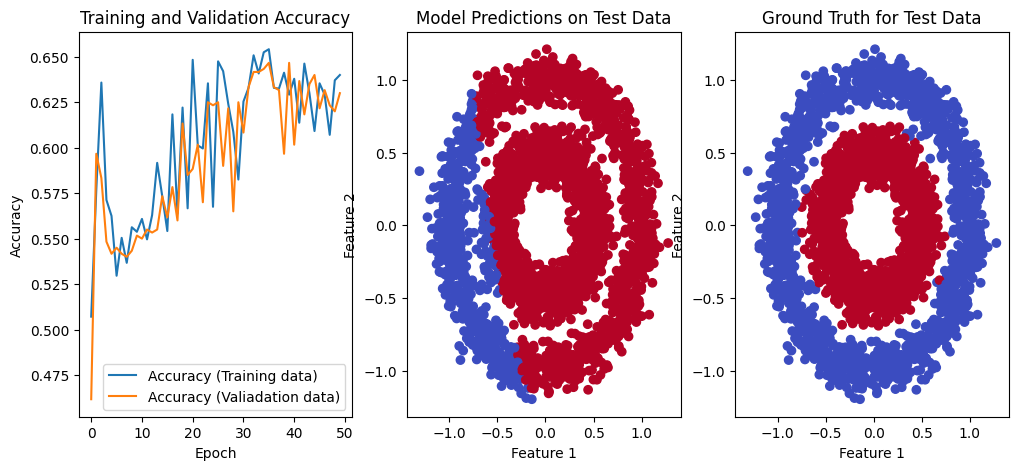

Test Loss: 0.6890
Test Accuracy: 0.6447


In [8]:
# Create and train a model with very few layers and/or neurons
underfit_model = build_model(num_layers=1, num_neurons=5)
train_and_evaluate_model(underfit_model, epochs=50)


94/94 [==============================] - 0s 3ms/step


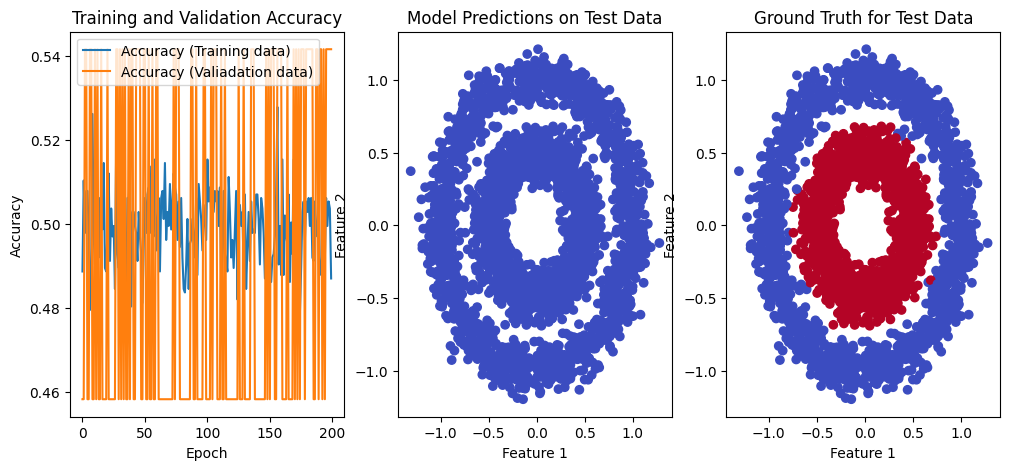

Test Loss: 0.6932
Test Accuracy: 0.4973


In [10]:
# Create a model with an excessive number of layers and/or neurons and increased epochs
overfit_model = build_model(num_layers=5, num_neurons=100)
train_and_evaluate_model(overfit_model,epochs=200)


94/94 [==============================] - 0s 3ms/step


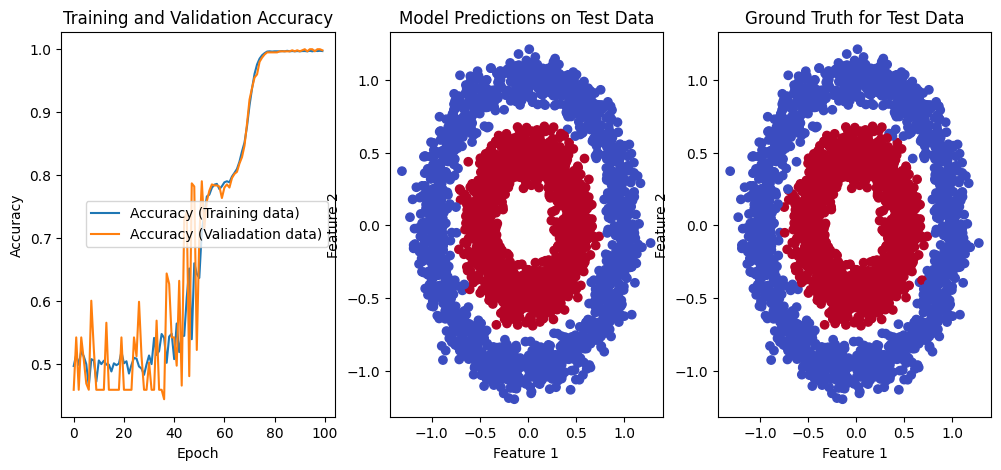

Test Loss: 0.0362
Test Accuracy: 0.9970


In [11]:
# Experiment to find a balanced architecture
balanced_model = build_model(num_layers=2, num_neurons=20)
train_and_evaluate_model(balanced_model, epochs=100)


# Experimentation
## Task 1: Underfitting
1. Create and train a model with very few layers and/or neurons (e.g., 1 layer with 5 neurons).
2. Evaluate Performance:
    * Plot training and validation accuracy over epochs.
    * Plot model predictions vs. ground truth on the test data.
    * Analyze if the model's performance is poor on both training and test data, which indicates underfitting.
## Task 2: Overfitting
1. Create a model with an excessive number of layers and/or neurons (e.g., 5 layers with 100 neurons each) and increased number of epochs.
2. Evaluate Performance:
    * Observe the training and validation accuracy plots for a wide gap, indicating overfitting.
    * Compare model predictions with ground truth for the test data.
    * Look for high training accuracy but poor test accuracy.
## Task 3: Balanced Model
1. Experiment to find a balanced architecture.
2. Evaluate Performance:
    * Ensure the training and validation accuracy are both high and close to each other.
    * The model's predictions should closely match the ground truth for the test data.
    * The model should not show signs of significant underfitting or overfitting.

# Evaluation and Analysis
Use similar evaluation and visualization code as in the previous exercise to assess model performance.
Answer questions like:
1. What signs of underfitting did you observe?
2. What were the indications of overfitting?
3. Describe the architecture of the balanced model and its performance.

# Conclusion
Reflect on the importance of matching model complexity with the problem complexity and discuss the trade-offs involved in designing neural network architectures.

------------------

# Regularization Technique: Early Stopping
## Objective
Understand how early stopping can be used as a regularization technique to prevent overfitting and improve the generalization of neural networks.

## Background
Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. It involves stopping the training process if the model's performance on a validation set starts to deteriorate, meaning the model begins to learn noise and details from the training data that negatively impact its performance on unseen data.

## How Early Stopping Works
* Monitor the model's performance on a validation set during training.
* If the performance on the validation set stops improving or starts to worsen, stop the training.
* Often, a 'patience' parameter is set to allow some leeway, meaning training will stop only after the model's performance hasn't improved for a specified number of epochs.


# Implementation in TensorFlow
TensorFlow provides an easy way to implement early stopping through callbacks. Here’s how you can add early stopping to your training process:

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback instance
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Include this callback in the model's fit method
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.6882 - accuracy: 0.6096 - val_loss: 0.6923 - val_accuracy: 0.5967
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5883 - val_loss: 0.6912 - val_accuracy: 0.5783
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.6062 - val_loss: 0.6898 - val_accuracy: 0.5533
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.6196 - val_loss: 0.6882 - val_accuracy: 0.5250
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5979 - val_loss: 0.6870 - val_accuracy: 0.5083
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5688 - val_loss: 0.6868 - val_accuracy: 0.5250
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5833 - val_loss: 0.6879 - val_accuracy: 0.5767
Epoch 8/100
7

## Task
1. Add early stopping to your neural network training process using the above code snippet.
2. Experiment with different values for the patience parameter and observe how it impacts the training process and the model's performance.

## Analysis and Questions
* How does early stopping affect the number of epochs for which your model trains?
* Did you observe any improvements in the generalization of your model to the test data?
* How does the patience parameter impact the effectiveness of early stopping?

## Conclusion
Reflect on the importance of regularization techniques like early stopping in preventing overfitting and improving model generalization.